In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql

In [2]:
# Load the weather dataset

CRData = pd.read_csv(r"C:\Users\Dlc\Downloads\creditcard.csv", header=0)

# Copy to back-up file

CRData_bk = CRData.copy()

# Display first 5 records

CRData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Display the information about the data set

CRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# dispaly the shape
CRData.shape

(284807, 31)

In [5]:
# Seperate as 2 dataset based on the target variable class

Q1 = psql.sqldf("select * from CRData where Class = 1 ")
Q2 = psql.sqldf("select * from CRData where Class = 0 ")


In [6]:
# Random sample the data as 20% from "Major Class"

Q3 = Q2.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.2))


In [7]:
# Combine the 'minor class' and 20% of 'major class' data as new file 

CCDataN = Q1.append(Q3, ignore_index=True)

# Display the shape of the file

CCDataN.shape


(57355, 31)

In [8]:
#count proportion (> 10 : 1),then dataset is imbalance dat)

# Count variable for nunber of class 1 and class 0 records

Class_og_count=CRData['Class'].value_counts()

# Display the number of Class 0 Records

print('Class 0: ',Class_og_count[0]);

# Display the number of Class 1 Records

print('Class 1: ',Class_og_count[1])

# calculate the proportion

print('Proportion: ',round(Class_og_count[0]/Class_og_count[1],2),': 1')

# lenth of data set

print('Total Record',len(CRData))

Class 0:  284315
Class 1:  492
Proportion:  577.88 : 1
Total Record 284807


In [9]:
#count proportion (> 10 : 1),then dataset is imbalance dat)

# Count variable for nunber of class 1 and class 0 records

CLass_count=CCDataN['Class'].value_counts()

# Display the number of Class 0 Records

print('Class 0: ',CLass_count[0]);

# Display the number of Class 1 Records

print('Class 1: ',CLass_count[1])

# calculate the proportion

print('Proportion: ',round(CLass_count[0]/CLass_count[1],2),': 1')

# lenth of data set

print('Total Record',len(CCDataN))

Class 0:  56863
Class 1:  492
Proportion:  115.58 : 1
Total Record 57355


In [10]:
# Remove the Features which are not influencing Data set

del CCDataN['Time']

In [11]:
# Identify  any dupliate records in dataset or not

cr_dup=CCDataN[CCDataN.duplicated(keep='last')]

# display the duplicates

cr_dup

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
225,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
226,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
227,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
228,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
229,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54185,1.228453,-0.315861,1.027850,-0.506512,-1.202308,-0.789326,-0.693301,-0.081156,3.199635,-1.437116,0.403206,-2.097406,0.975897,1.412698,0.604570,-0.441159,0.623645,0.539810,0.353355,-0.186962,-0.163424,-0.028745,-0.025910,0.331949,0.451893,-0.724265,0.060782,0.029434,11.85,0
54407,1.994313,0.188896,-1.530826,1.291515,0.427909,-0.882011,0.515836,-0.261520,-0.024181,0.437869,0.758214,0.904891,-0.618896,0.784481,-1.198289,-0.556647,-0.332382,-0.163018,0.038232,-0.325278,0.099654,0.485420,0.005909,0.016116,0.410866,-0.510497,-0.018594,-0.073215,1.00,0
54485,1.572441,-1.213639,-1.153023,-2.500236,0.979841,3.235834,-1.485561,0.746395,-1.985077,1.499207,-0.242736,-1.026946,0.499188,-0.175512,0.749956,-0.077069,0.006353,0.397682,0.127090,-0.198687,-0.266291,-0.525249,-0.002477,0.981843,0.548044,-0.191426,0.032333,0.014574,15.00,0
54552,1.757259,-0.023838,0.944493,3.773188,-0.820666,0.855771,-1.165241,0.483432,-0.100729,1.532903,0.330622,0.084458,-0.698885,-0.117093,-0.586137,1.835846,-1.285736,0.880416,-1.798001,-0.300175,0.281617,0.811455,0.275421,-0.041433,-0.586655,-0.045673,0.041143,-0.027230,12.13,0


In [12]:
# Remove the Duplicate records

CCDataN=CCDataN.drop_duplicates()

# Display first 5 records

CCDataN.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [13]:
# Identify  any dupliate records in dataset or not

cr_dup=CCDataN[CCDataN.duplicated(keep='last')]

# display the duplicates

cr_dup

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [14]:
# Identify the missing values in Dataset

CCDataN.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# description of Data set

CCDataN.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,56657.0,-0.043771,2.038896,-41.928738,-0.942779,-0.032370,1.299918,2.422508
V2,56657.0,0.026685,1.702661,-63.344698,-0.591985,0.081603,0.820606,22.057729
V3,56657.0,-0.030017,1.688723,-31.103685,-0.885021,0.181534,1.025024,3.934739
V4,56657.0,0.030994,1.477421,-5.683171,-0.848762,-0.009144,0.771208,16.715537
V5,56657.0,-0.023700,1.444873,-40.427726,-0.697114,-0.058440,0.612734,34.099309
V6,56657.0,-0.011654,1.334560,-23.496714,-0.775698,-0.278846,0.391335,23.917837
V7,56657.0,-0.027843,1.408549,-43.557242,-0.561013,0.040740,0.581035,44.054461
V8,56657.0,0.002692,1.259145,-41.044261,-0.209059,0.023150,0.326683,20.007208
V9,56657.0,-0.020726,1.132777,-13.434066,-0.661004,-0.059465,0.588535,10.313974
V10,56657.0,-0.032971,1.226540,-24.588262,-0.545575,-0.095912,0.458136,12.901627


In [16]:
# Find correlation between the Features

corr=CCDataN.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.066866,0.130523,-0.056733,0.091007,0.012488,0.139423,-0.033996,0.067465,0.130992,-0.071109,0.112247,-0.001351,0.102627,0.001144,0.099088,0.160422,0.084084,-0.020000,-0.055871,-0.007459,0.007104,0.003398,-0.005987,-0.000029,0.002365,0.011002,0.006045,-0.226354,-0.200462
V2,-0.066866,1.000000,-0.100111,0.062987,-0.055340,-0.025111,-0.115077,0.017705,-0.046745,-0.092862,0.070249,-0.102057,0.000171,-0.105288,0.002475,-0.082429,-0.132412,-0.063278,0.028864,-0.042977,-0.019390,0.011258,-0.002313,0.003998,0.006344,0.011785,0.023647,0.006148,-0.539472,0.182106
V3,0.130523,-0.100111,1.000000,-0.117140,0.140902,0.052200,0.203416,-0.056168,0.107221,0.202276,-0.122417,0.205435,-0.002287,0.192632,0.017362,0.173011,0.249021,0.112719,-0.024603,-0.052545,-0.008219,-0.002809,-0.011224,0.009294,-0.009585,-0.002446,0.002003,-0.003064,-0.192482,-0.364013
V4,-0.056733,0.062987,-0.117140,1.000000,-0.069741,-0.019661,-0.116615,0.028714,-0.065308,-0.128335,0.083390,-0.141898,0.003348,-0.137390,-0.013726,-0.118315,-0.153956,-0.066787,0.025579,0.043055,0.005564,0.010085,-0.005529,-0.003259,-0.001750,-0.001851,-0.009424,0.009691,0.102177,0.275844
V5,0.091007,-0.055340,0.140902,-0.069741,1.000000,0.019885,0.145656,-0.056198,0.067859,0.130166,-0.068700,0.123134,-0.002950,0.103950,0.001255,0.114156,0.175205,0.085178,-0.033634,-0.063351,-0.012051,-0.004351,-0.051564,-0.005661,-0.013329,0.001474,0.039794,-0.017544,-0.356862,-0.186288
V6,0.012488,-0.025111,0.052200,-0.019661,0.019885,1.000000,0.030025,-0.025353,0.020833,0.043787,-0.043848,0.053664,-0.001671,0.058561,-0.015117,0.034075,0.055997,0.032005,-0.012862,0.032242,0.013223,-0.004087,0.039563,-0.005851,0.000267,-0.001748,-0.035395,0.014269,0.210615,-0.097688
V7,0.139423,-0.115077,0.203416,-0.116615,0.145656,0.030025,1.000000,-0.007764,0.096912,0.199231,-0.136357,0.204609,-0.001886,0.188633,0.004999,0.177745,0.273905,0.144423,-0.044258,0.037666,0.037267,-0.020335,0.063866,-0.001205,0.010485,-0.002177,-0.036526,0.027785,0.345243,-0.335352
V8,-0.033996,0.017705,-0.056168,0.028714,-0.056198,-0.025353,-0.007764,1.000000,-0.016135,-0.035883,0.035420,-0.053538,0.008978,-0.061259,0.002604,-0.054307,-0.083464,-0.036459,0.019990,-0.020645,0.032303,-0.013301,-0.011092,-0.005713,0.006891,0.002796,0.044421,0.002896,-0.084721,0.069268
V9,0.067465,-0.046745,0.107221,-0.065308,0.067859,0.020833,0.096912,-0.016135,1.000000,0.105766,-0.075896,0.113561,-0.002634,0.112986,0.000083,0.104429,0.143298,0.068766,-0.016511,-0.019099,0.008631,-0.007336,-0.010291,0.003290,-0.006438,-0.001032,0.011410,-0.004593,-0.051186,-0.202613
V10,0.130992,-0.092862,0.202276,-0.128335,0.130166,0.043787,0.199231,-0.035883,0.105766,1.000000,-0.139128,0.230574,-0.006473,0.231595,0.008042,0.194695,0.284668,0.132916,-0.042698,-0.039597,0.005155,-0.016866,-0.010450,0.005471,-0.006690,-0.004553,0.007280,-0.002291,-0.099801,-0.405480


<AxesSubplot:>

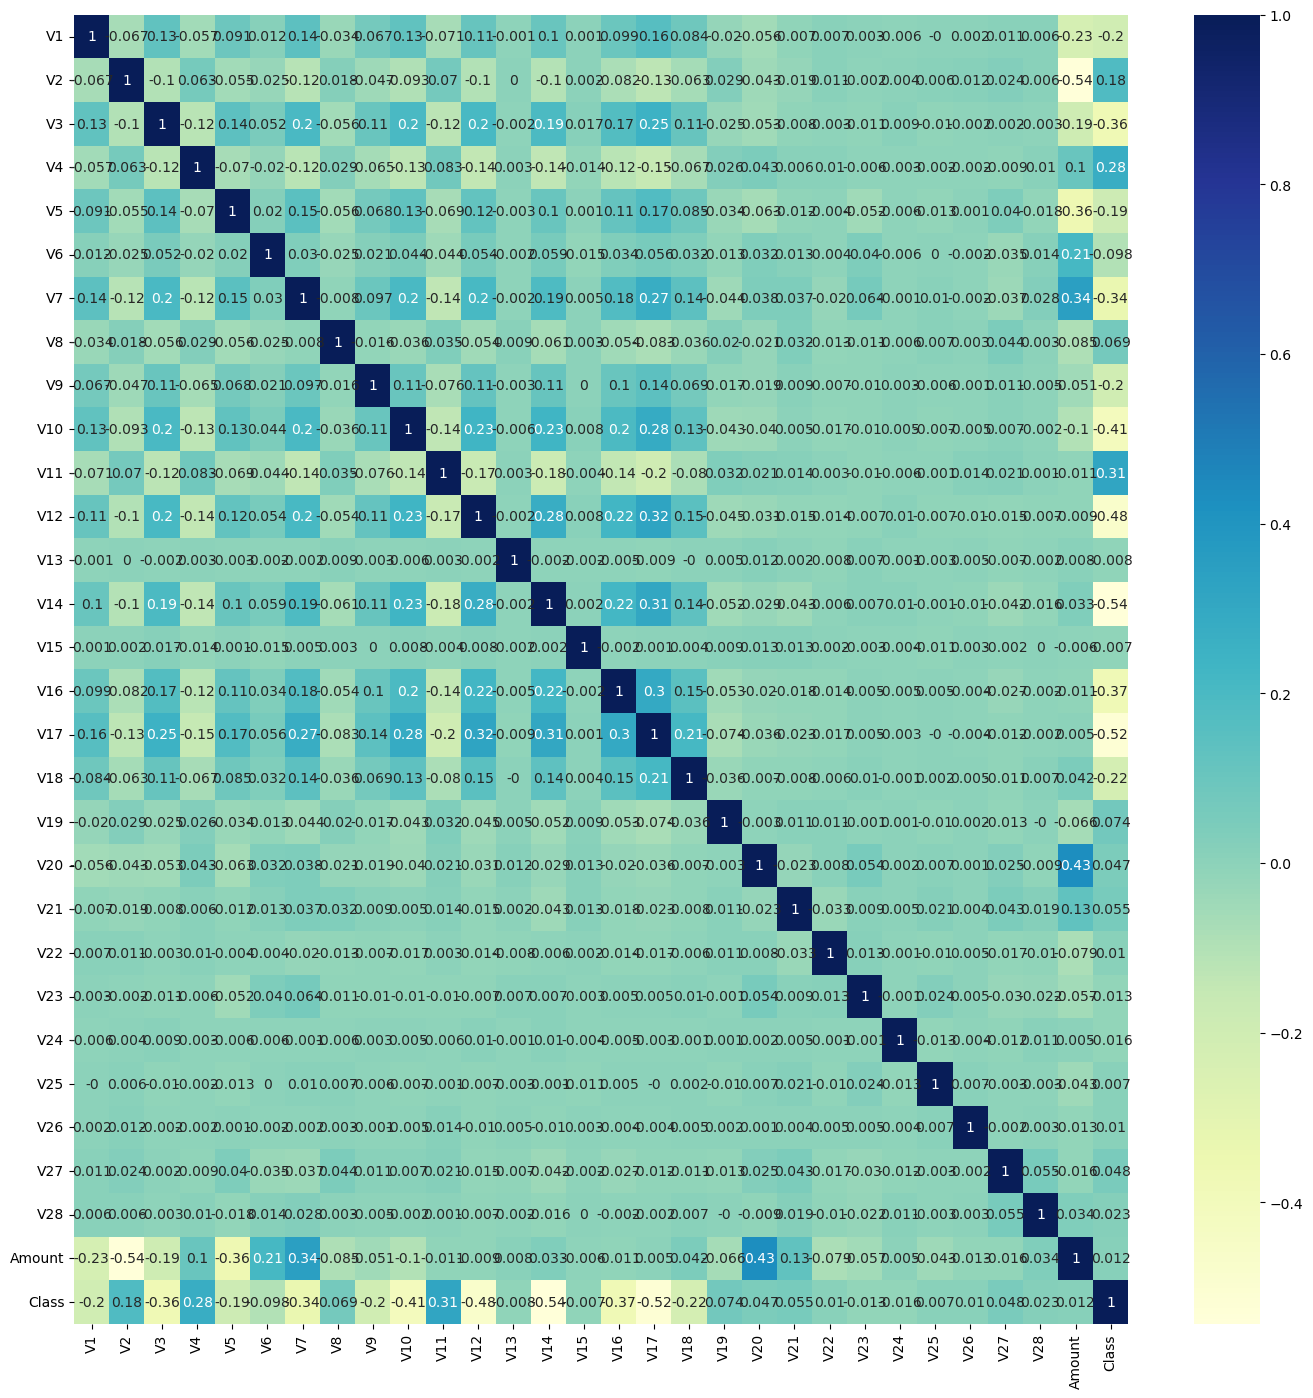

In [17]:
# Heat map for correlation matrix

plt.figure(figsize=(17,17))

sns.heatmap(round(corr,3),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Amount', ylabel='Class'>

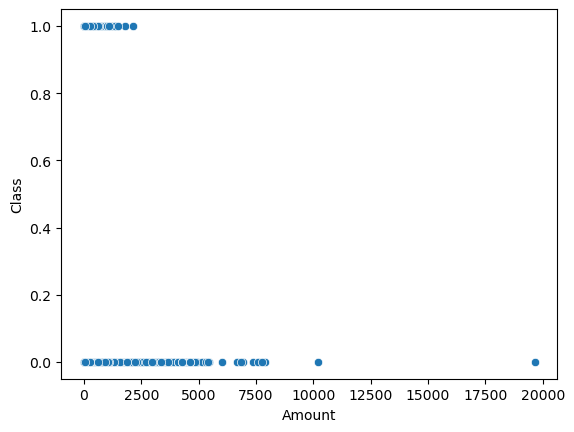

In [18]:
# Scatterplot For 'Amount' and 'Class'

sns.scatterplot(x='Amount',y='Class',data=CCDataN)

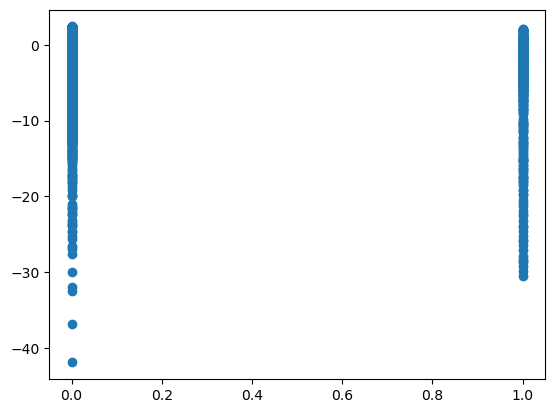

In [19]:
# Scatterplot For 'V1' and 'Class'

plt.scatter(y='V1',x='Class',data=CCDataN)

<AxesSubplot:xlabel='V2', ylabel='V1'>

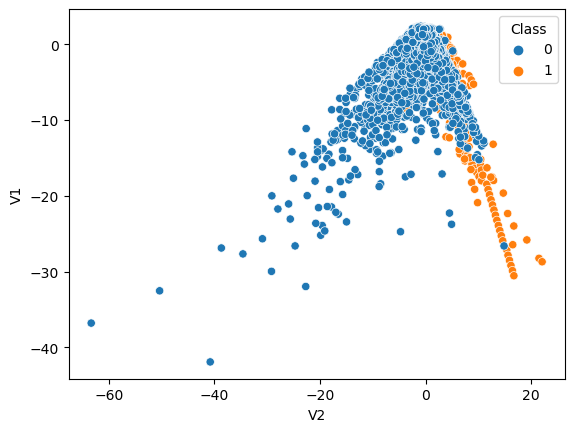

In [20]:
# Scatterplot For 'V1' and 'V2' with Class Seperation

sns.scatterplot(y='V1',x='V2',data=CCDataN,hue='Class')

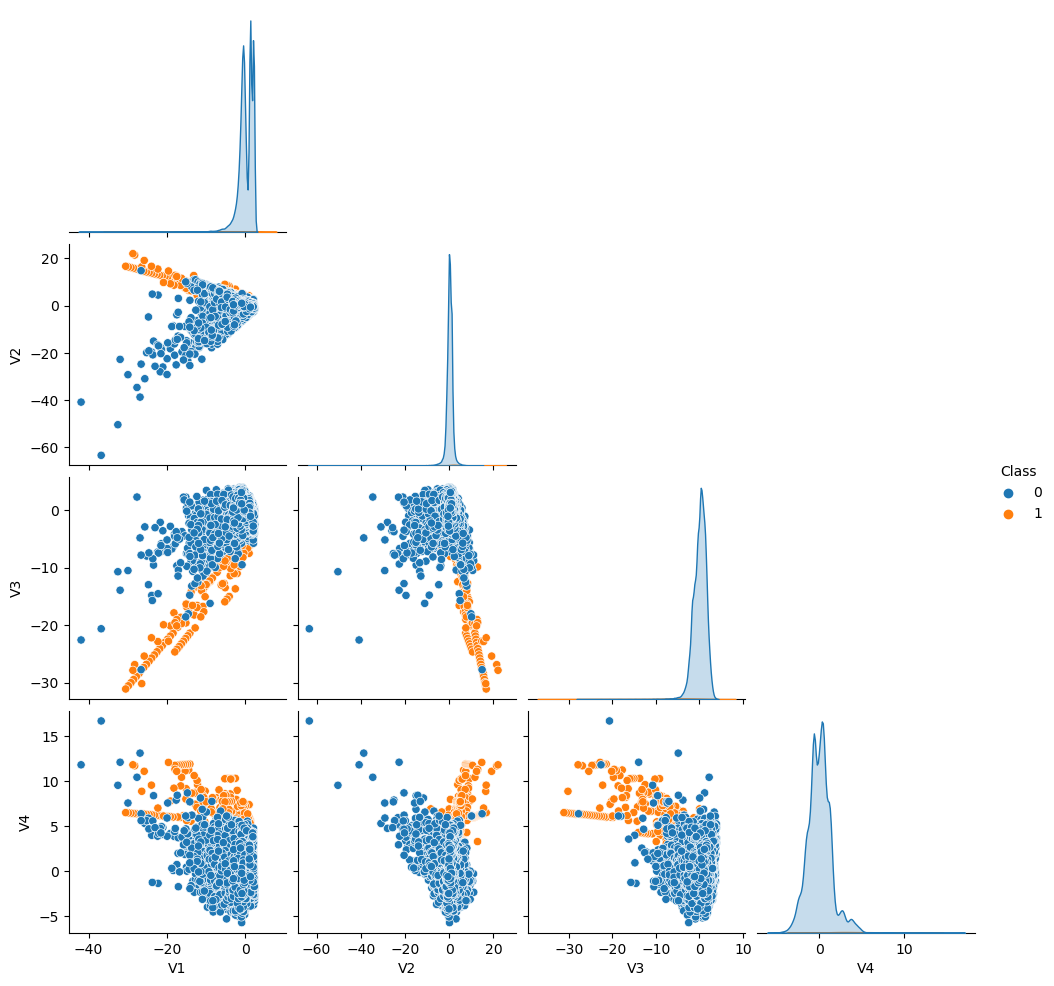

In [21]:
# Pairplot for some of Features

sns.pairplot(CCDataN[['V1','V2','V3','V4','Class']],hue='Class',corner=True)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

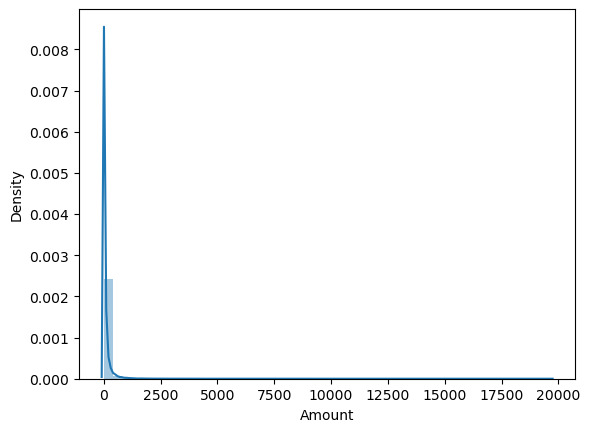

In [22]:
# Distrubution Plot for 'Amount' feature

sns.distplot(CCDataN['Amount'])

<AxesSubplot:xlabel='V15', ylabel='Density'>

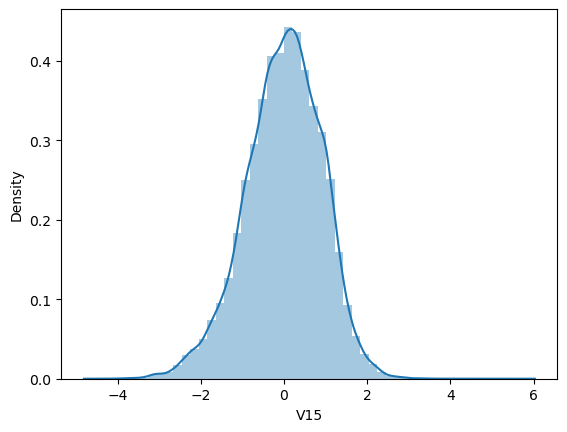

In [23]:
# Distrubution Plot for 'V15' feature

sns.distplot(CCDataN['V15'])

<AxesSubplot:xlabel='V22', ylabel='Density'>

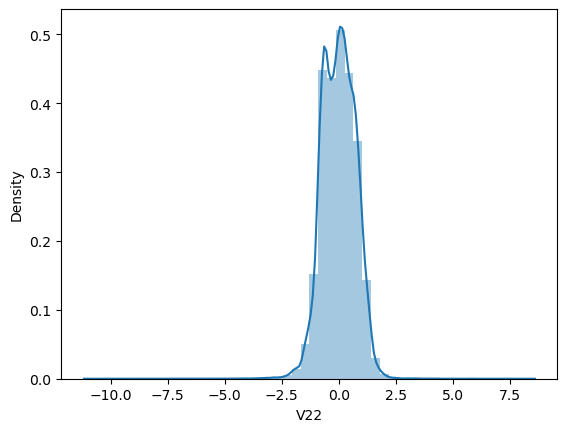

In [24]:
# Distrubution Plot for 'V22' feature

sns.distplot(CCDataN['V22'])

In [25]:
# Count the values for each class 0 and 1

CCDataN['Class'].value_counts()

0    56184
1      473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

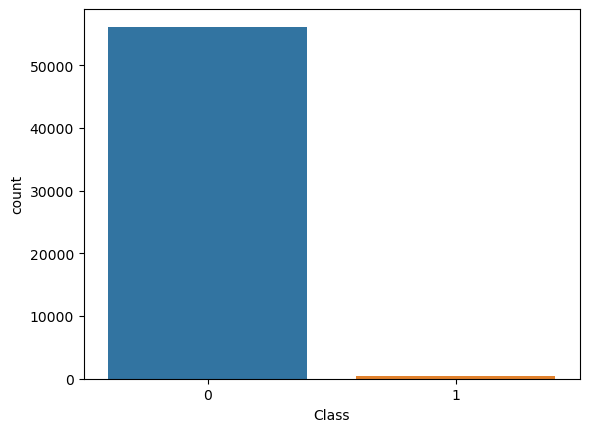

In [26]:
# BarPlot for the Class Variable

sns.countplot(CCDataN['Class'])

In [27]:
# Splitting the record into Class 0 and Class 1

Class_0=CCDataN[CCDataN.Class==0]
Class_1=CCDataN[CCDataN.Class==1]

In [28]:
# Describe the Dataset Group by  Calss column
CCDataN.groupby('Class').describe()

V1                                                             \
         count     mean       std        min      25%       50%       75%   
Class                                                                       
0      56184.0 -0.00627  1.912706 -41.928738 -0.92874 -0.017601  1.305394   
1        473.0 -4.49828  6.593145 -30.552380 -5.60369 -2.271755 -0.361428   

                      V2                                                     \
            max    count      mean       std        min       25%       50%   
Class                                                                         
0      2.422508  56184.0 -0.001764  1.638211 -63.344698 -0.596622  0.075028   
1      2.132386    473.0  3.405965  4.122500  -8.402154  1.145381  2.617105   

                                 V3                                           \
            75%        max    count      mean       std        min       25%   
Class                                                                          
0      0.807234  14.845545  56184.0  0.026385  1.446941 -27.747084 -0.856779   
1      4.571743  22.057729    473.0 -6.729599  6.909647 -31.103685 -7.926507   

                                          V4                                \
            50%       75%       max    count      mean       std       min   
Class                                                                        
0      0.192596  1.031549  3.934739  56184.0 -0.006399  1.401568 -5.683171   
1     -4.875397 -2.171454  2.250210    473.0  4.472591  2.871523 -1.313275   

                                                     V5                      \
            25%       50%       75%        max    count      mean       std   
Class                                                                         
0     -0.855240 -0.022057  0.746947  16.715537  56184.0  0.000996  1.340921   
1      2.288644  4.100098  6.290918  12.114672    473.0 -2.957197  5.278831   

                                                                V6            \
             min       25%       50%       75%        max    count      mean   
Class                                                                          
0     -40.427726 -0.687255 -0.054562  0.614101  34.099309  56184.0  0.000308   
1     -22.105532 -4.278983 -1.372245  0.260821  11.095089    473.0 -1.432518   

                                                                          V7  \
            std        min       25%       50%       75%        max    count   
Class                                                                          
0      1.324456 -23.496714 -0.769060 -0.274053  0.395828  23.917837  56184.0   
1      1.715347  -6.406267 -2.450444 -1.420468 -0.413647   6.474115    473.0   

                                                                               \
           mean       std        min       25%       50%       75%        max   
Class                                                                           
0      0.015497  1.174984 -26.548144 -0.550373  0.045969  0.583698  44.054461   
1     -5.175912  6.858024 -43.557242 -6.989195 -2.902079 -0.907188   5.802537   

            V8                                                               \
         count      mean       std        min       25%       50%       75%   
Class                                                                         
0      56184.0 -0.005311  1.152816 -39.267378 -0.209139  0.021586  0.320608   
1        473.0  0.953255  5.585950 -41.044261 -0.161518  0.617738  1.709417   

                       V9                                                     \
             max    count      mean       std        min       25%       50%   
Class                                                                          
0      17.573712  56184.0  0.000333  1.090788  -5.310922 -0.646206 -0.052569   
1      20.007208    473.0 -2.522124  2.465047 -13.434066 -3.796760 -2.099049   

                                V10  

In [29]:
# Identify Target(Dependent) and independent variables

IndepVar=[]
for col in CCDataN.columns:
    if col !='Class':
        IndepVar.append(col)
TargetVar='Class'

x=CCDataN[IndepVar]
y=CCDataN[TargetVar]

In [30]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

# Object Ceation
oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x,y)

print(x_over.shape)
print(y_over.shape)

(63207, 29)
(63207,)


In [31]:
# Split the data into Train and Test(random samping)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)

# Display shape for train and test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((44244, 29), (18963, 29), (44244,), (18963,))

In [32]:
# Scalling the Train data set with StandardScaler Class 

#import the StandardSacler Class

from sklearn.preprocessing import StandardScaler

# Create the object

sscaler=StandardScaler()

x_train['Amount']=sscaler.fit_transform(x_train[['Amount']])
x_train=pd.DataFrame(x_train)

x_test['Amount']=sscaler.fit_transform(x_test[['Amount']])
x_test=pd.DataFrame(x_test)

In [33]:
# Load the EMResults Data Set

EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)

# Copy the Data set

EMResults1=EMResults.copy()

# Display the first  Rows

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [34]:
# Load the KNN_Results Data Set

KNN_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results.csv",header=0)

# Display the first  Rows

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 2141     0]
 [   23 16799]]
Outcome values : 
 2141 0 23 16799
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      1.00      1.00     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.9 %
Precision : 98.9 %
Recall : 100.0 %
F1 Score : 0.995
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
MCC : 0.994
roc_auc_score: 0.999


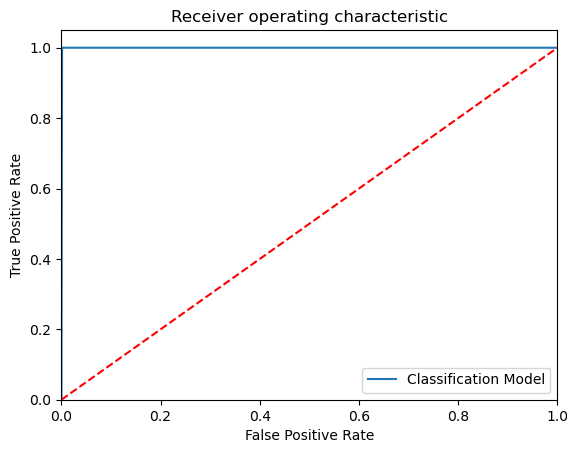

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 2137     4]
 [   23 16799]]
Outcome values : 
 2137 4 23 16799
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      1.00      1.00     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.9 %
Precision : 98.9 %
Recall : 99.8 %
F1 Score : 0.994
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 99.8 %
MCC : 0.993
roc_auc_score: 0.998


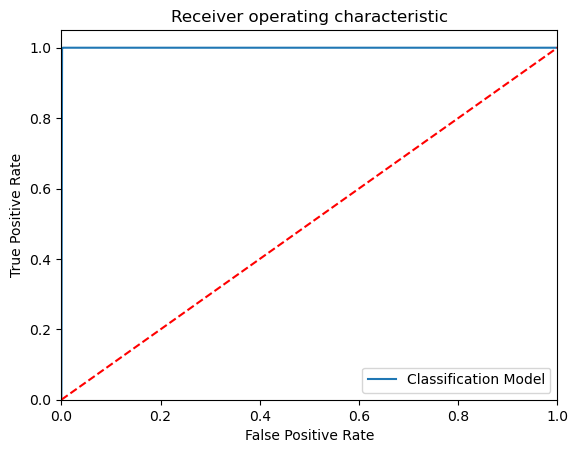

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 2137     4]
 [   51 16771]]
Outcome values : 
 2137 4 51 16771
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      1.00      0.99     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.7 %
Precision : 97.7 %
Recall : 99.8 %
F1 Score : 0.987
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.8 %
MCC : 0.986
roc_auc_score: 0.998


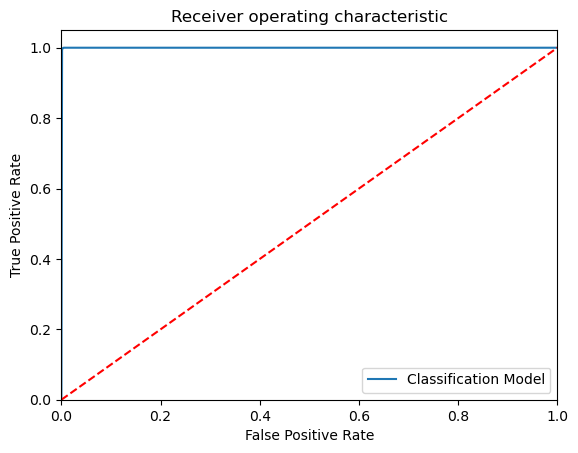

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 2137     4]
 [   51 16771]]
Outcome values : 
 2137 4 51 16771
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      1.00      0.99     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.7 %
Precision : 97.7 %
Recall : 99.8 %
F1 Score : 0.987
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.8 %
MCC : 0.986
roc_auc_score: 0.998


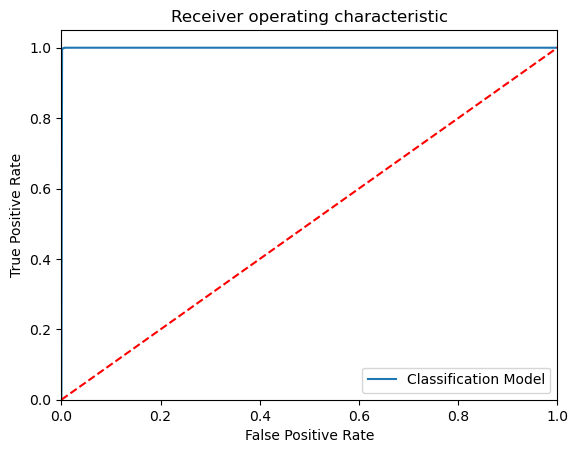

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2137     4]
 [   76 16746]]
Outcome values : 
 2137 4 76 16746
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.98      1.00      0.99     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.6 %
Precision : 96.6 %
Recall : 99.8 %
F1 Score : 0.982
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 99.6 %
MCC : 0.979
roc_auc_score: 0.997


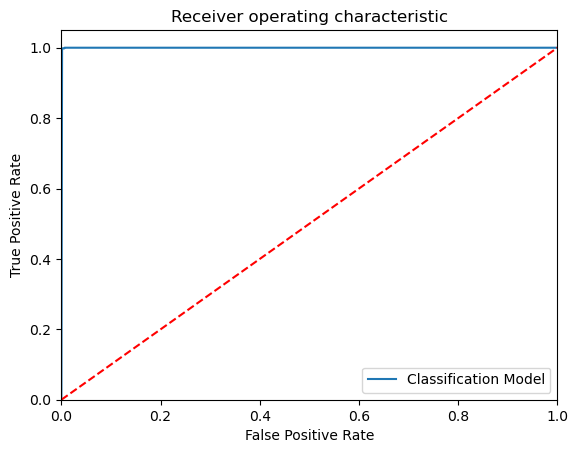

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 2137     4]
 [   76 16746]]
Outcome values : 
 2137 4 76 16746
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.98      1.00      0.99     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.6 %
Precision : 96.6 %
Recall : 99.8 %
F1 Score : 0.982
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 99.6 %
MCC : 0.979
roc_auc_score: 0.997


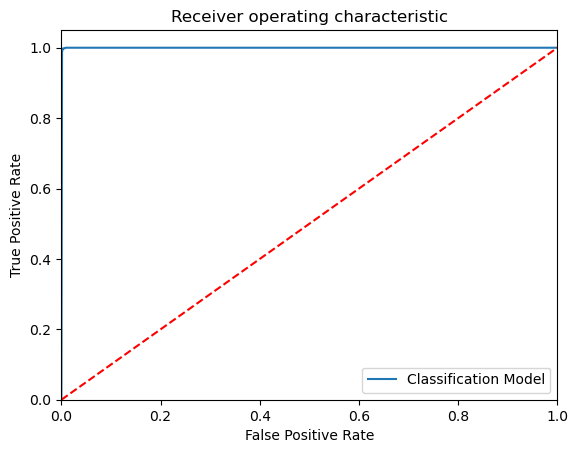

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 2137     4]
 [   96 16726]]
Outcome values : 
 2137 4 96 16726
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.98      1.00      0.99     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.5 %
Precision : 95.7 %
Recall : 99.8 %
F1 Score : 0.977
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 99.6 %
MCC : 0.974
roc_auc_score: 0.996


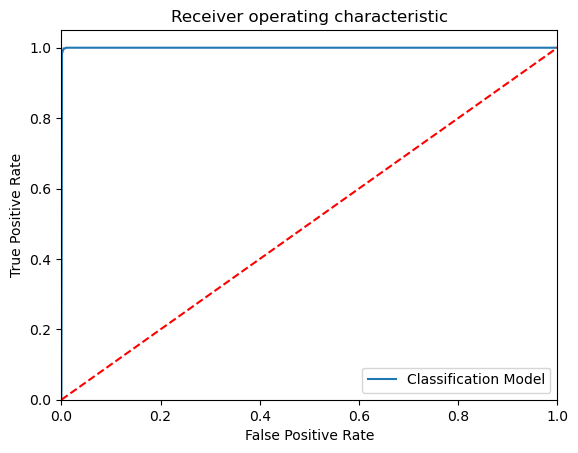

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 2137     4]
 [   96 16726]]
Outcome values : 
 2137 4 96 16726
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.98      1.00      0.99     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.5 %
Precision : 95.7 %
Recall : 99.8 %
F1 Score : 0.977
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 99.6 %
MCC : 0.974
roc_auc_score: 0.996


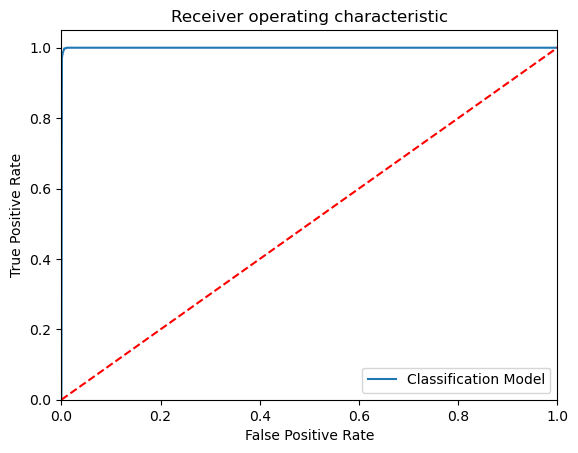

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 2137     4]
 [  112 16710]]
Outcome values : 
 2137 4 112 16710
Classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.97      1.00      0.99     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.4 %
Precision : 95.0 %
Recall : 99.8 %
F1 Score : 0.974
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.6 %
MCC : 0.97
roc_auc_score: 0.996


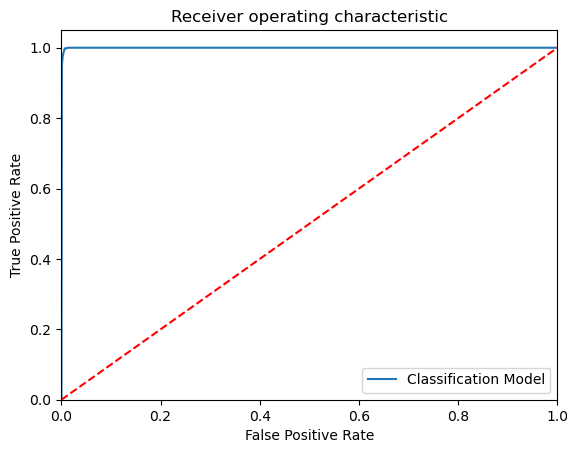

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 2122    19]
 [  107 16715]]
Outcome values : 
 2122 19 107 16715
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.98      0.99      0.98     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.3 %
Precision : 95.2 %
Recall : 99.1 %
F1 Score : 0.971
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 99.2 %
MCC : 0.968
roc_auc_score: 0.992


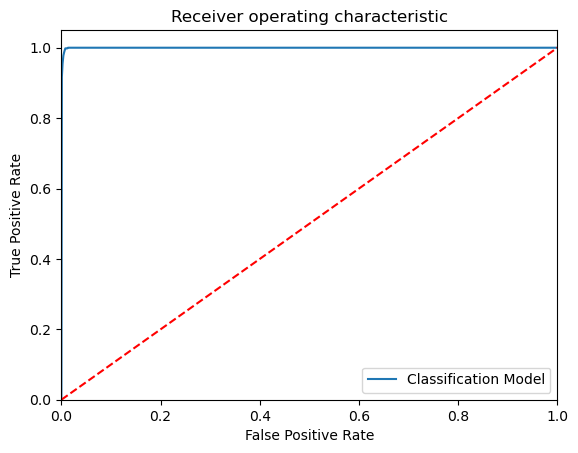

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 2122    19]
 [  128 16694]]
Outcome values : 
 2122 19 128 16694
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.97      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.99      0.98     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.2 %
Precision : 94.3 %
Recall : 99.1 %
F1 Score : 0.967
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 99.2 %
MCC : 0.963
roc_auc_score: 0.992


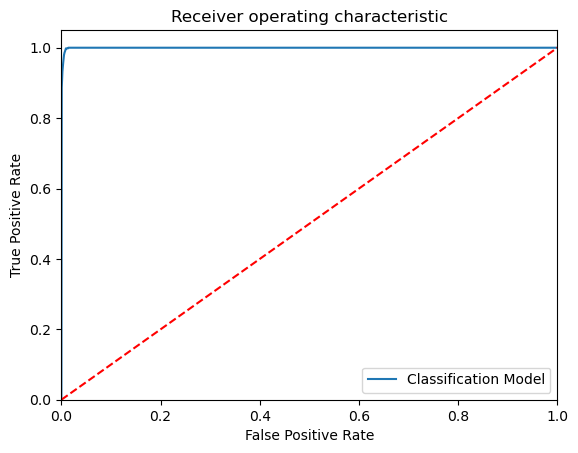

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 2111    30]
 [  126 16696]]
Outcome values : 
 2111 30 126 16696
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.96      2141
           0       1.00      0.99      1.00     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.99      0.98     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.2 %
Precision : 94.4 %
Recall : 98.6 %
F1 Score : 0.964
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.0 %
MCC : 0.96
roc_auc_score: 0.989


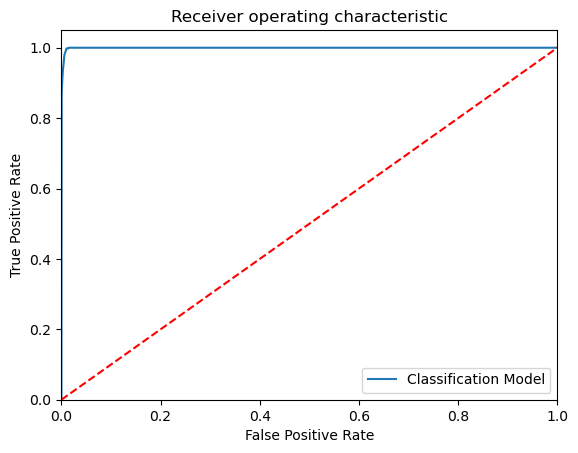

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 2111    30]
 [  148 16674]]
Outcome values : 
 2111 30 148 16674
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.99      0.96      2141
           0       1.00      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.99      0.98     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.1 %
Precision : 93.4 %
Recall : 98.6 %
F1 Score : 0.96
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 98.8 %
MCC : 0.955
roc_auc_score: 0.989


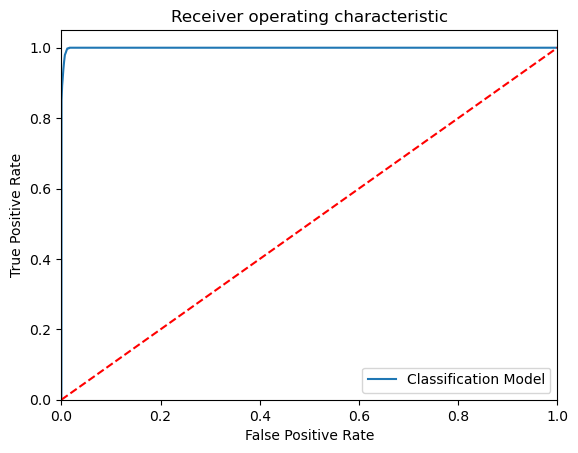

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 2097    44]
 [  141 16681]]
Outcome values : 
 2097 44 141 16681
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.98      0.96      2141
           0       1.00      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.99      0.98     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 99.0 %
Precision : 93.7 %
Recall : 97.9 %
F1 Score : 0.958
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 98.6 %
MCC : 0.953
roc_auc_score: 0.986


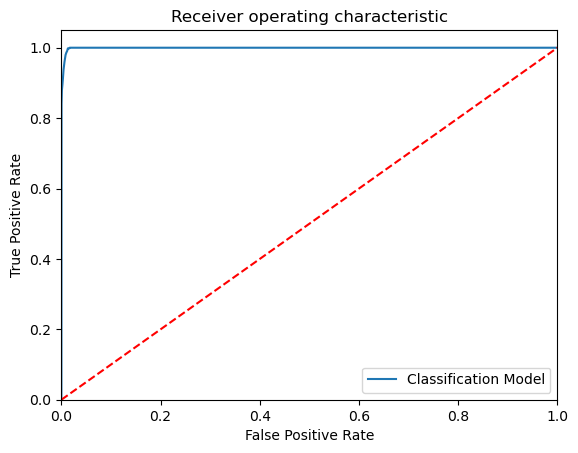

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 2097    44]
 [  160 16662]]
Outcome values : 
 2097 44 160 16662
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95      2141
           0       1.00      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.96      0.98      0.97     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.9 %
Precision : 92.9 %
Recall : 97.9 %
F1 Score : 0.954
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 98.4 %
MCC : 0.948
roc_auc_score: 0.985


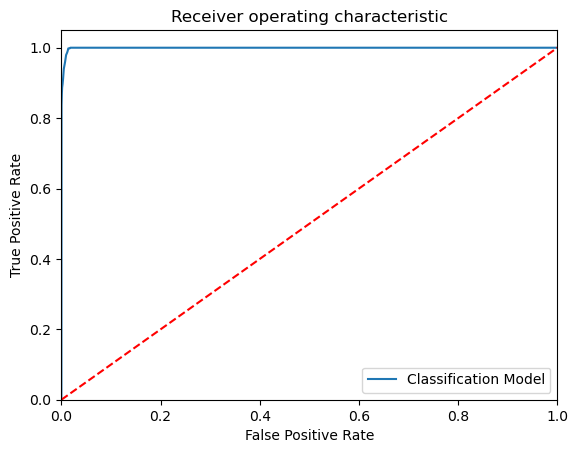

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 2058    83]
 [  141 16681]]
Outcome values : 
 2058 83 141 16681
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95      2141
           0       1.00      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.98      0.97     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.8 %
Precision : 93.6 %
Recall : 96.1 %
F1 Score : 0.948
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 97.6 %
MCC : 0.942
roc_auc_score: 0.976


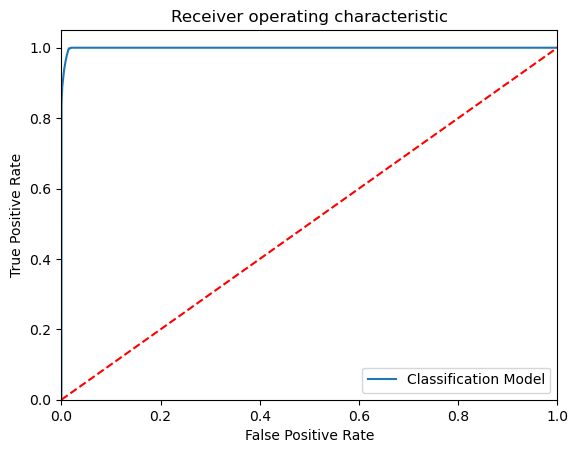

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 2058    83]
 [  161 16661]]
Outcome values : 
 2058 83 161 16661
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.96      0.94      2141
           0       1.00      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.96      0.98      0.97     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.7 %
Precision : 92.7 %
Recall : 96.1 %
F1 Score : 0.944
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 97.6 %
MCC : 0.937
roc_auc_score: 0.976


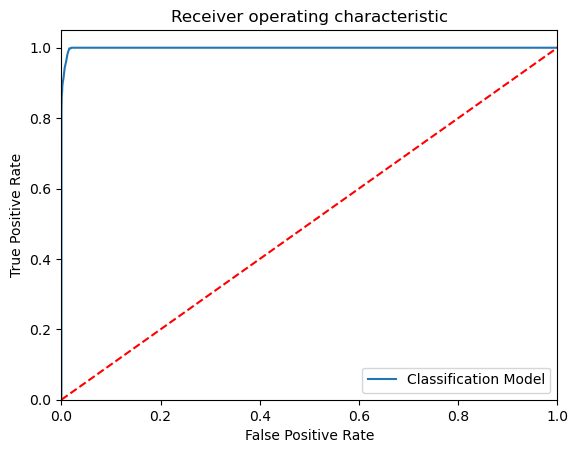

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 2017   124]
 [  128 16694]]
Outcome values : 
 2017 124 128 16694
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.94      0.94      2141
           0       0.99      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.97      0.97      0.97     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.7 %
Precision : 94.0 %
Recall : 94.2 %
F1 Score : 0.941
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 96.7 %
MCC : 0.934
roc_auc_score: 0.967


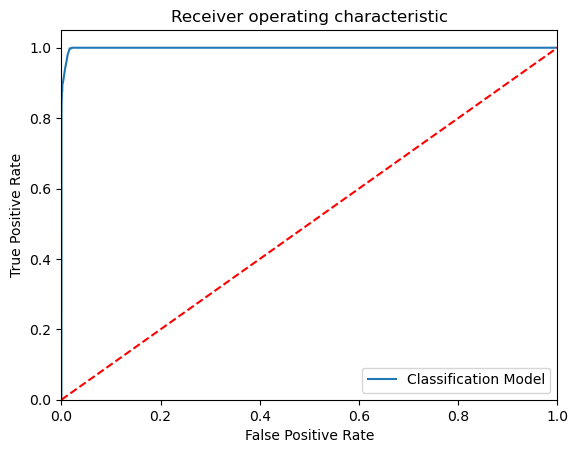

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 2017   124]
 [  139 16683]]
Outcome values : 
 2017 124 139 16683
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.94      0.94      2141
           0       0.99      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.96      0.97      0.97     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.6 %
Precision : 93.6 %
Recall : 94.2 %
F1 Score : 0.939
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 96.7 %
MCC : 0.931
roc_auc_score: 0.967


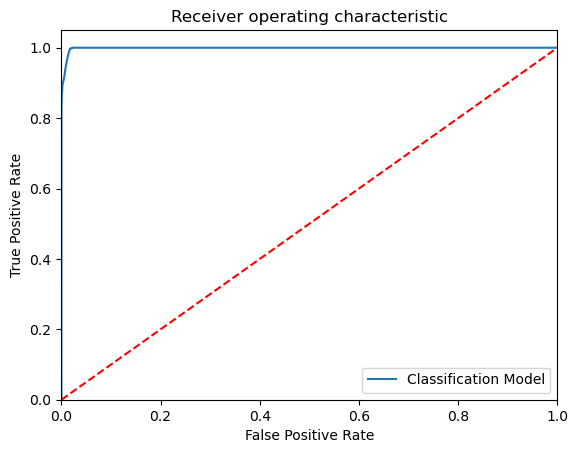

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1961   180]
 [  105 16717]]
Outcome values : 
 1961 180 105 16717
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.92      0.93      2141
           0       0.99      0.99      0.99     16822

    accuracy                           0.98     18963
   macro avg       0.97      0.95      0.96     18963
weighted avg       0.98      0.98      0.98     18963

Accuracy : 98.5 %
Precision : 94.9 %
Recall : 91.6 %
F1 Score : 0.932
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 95.5 %
MCC : 0.924
roc_auc_score: 0.955


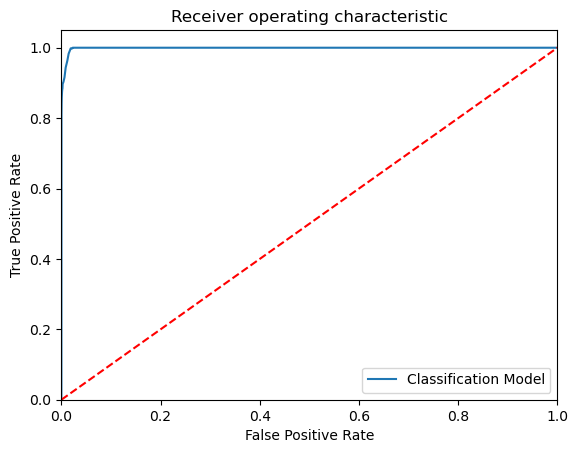

In [35]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [36]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,2141,0,23,16799,0.999,0.989,1.000,0.995,0.999,0.994,0.999316,1.000
1,KNeighborsClassifier(n_neighbors=2),2,2137,4,23,16799,0.999,0.989,0.998,0.994,0.999,0.993,0.998382,0.998
2,KNeighborsClassifier(n_neighbors=3),3,2137,4,51,16771,0.997,0.977,0.998,0.987,0.997,0.986,0.997550,0.998
3,KNeighborsClassifier(n_neighbors=4),4,2137,4,51,16771,0.997,0.977,0.998,0.987,0.997,0.986,0.997550,0.998
4,KNeighborsClassifier(),5,2137,4,76,16746,0.996,0.966,0.998,0.982,0.995,0.979,0.996807,0.996
5,KNeighborsClassifier(n_neighbors=6),6,2137,4,76,16746,0.996,0.966,0.998,0.982,0.995,0.979,0.996807,0.996
6,KNeighborsClassifier(n_neighbors=7),7,2137,4,96,16726,0.995,0.957,0.998,0.977,0.994,0.974,0.996212,0.996
7,KNeighborsClassifier(n_neighbors=8),8,2137,4,96,16726,0.995,0.957,0.998,0.977,0.994,0.974,0.996212,0.996
8,KNeighborsClassifier(n_neighbors=9),9,2137,4,112,16710,0.994,0.950,0.998,0.974,0.993,0.970,0.995737,0.996
9,KNeighborsClassifier(n_neighbors=10),10,2122,19,107,16715,0.993,0.952,0.991,0.971,0.994,0.968,0.992382,0.992


# SVM Algorithms

# LINEAR KERNAL

Model Name:  SVM - Linear
Confusion matrix : 
 [[ 1784   357]
 [   10 16812]]
Outcome values : 
 1784 357 10 16812
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.83      0.91      2141
           0       0.98      1.00      0.99     16822

    accuracy                           0.98     18963
   macro avg       0.99      0.92      0.95     18963
weighted avg       0.98      0.98      0.98     18963

Accuracy : 98.1 %
Precision : 99.4 %
Recall : 83.3 %
F1 Score : 0.907
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 91.6 %
MCC : 0.9
roc_auc_score: 0.916


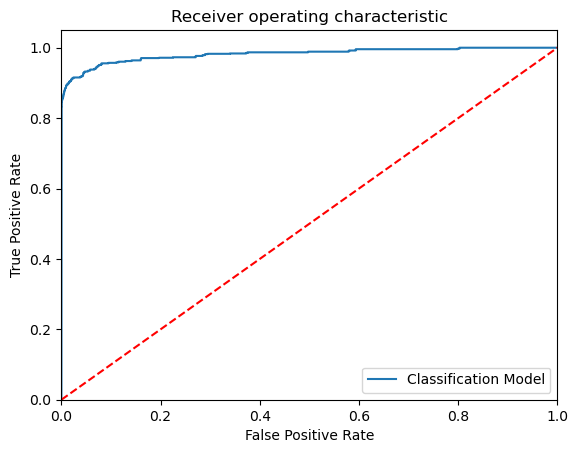

-----------------------------------------------------------------------------------------------------
{'Model Name': 'SVM - Linear', 'True_Positive': 1784, 'False_Negative': 357, 'False_Positive': 10, 'True_Negative': 16812, 'Accuracy': 0.981, 'Precision': 0.994, 'Recall': 0.833, 'F1 Score': 0.907, 'Specificity': 0.999, 'MCC': 0.9, 'ROC_AUC_Score': 0.9163305142267436, 'Balanced Accuracy': 0.916}


In [37]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
print(new_row)
EMResults1= EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# POLINOMIAL KERNAL

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 1885   256]
 [   26 16796]]
Outcome values : 
 1885 256 26 16796
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93      2141
           0       0.98      1.00      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.99      0.94      0.96     18963
weighted avg       0.99      0.99      0.98     18963

Accuracy : 98.5 %
Precision : 98.6 %
Recall : 88.0 %
F1 Score : 0.93
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 93.9 %
MCC : 0.924
roc_auc_score: 0.939


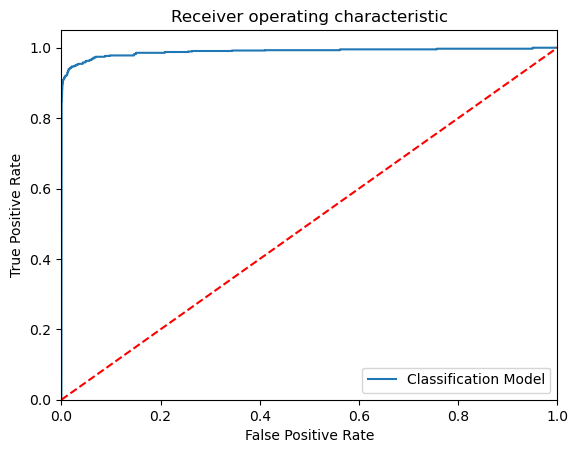

-----------------------------------------------------------------------------------------------------
{'Model Name': 'SVM - Polynominal', 'True_Positive': 1885, 'False_Negative': 256, 'False_Positive': 26, 'True_Negative': 16796, 'Accuracy': 0.985, 'Precision': 0.986, 'Recall': 0.88, 'F1 Score': 0.93, 'Specificity': 0.998, 'MCC': 0.924, 'ROC_AUC_Score': 0.9394420553454417, 'Balanced Accuracy': 0.939}


In [38]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
print(new_row)
EMResults1= EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# GUSSIAN KERNAL

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 2047    94]
 [  185 16637]]
Outcome values : 
 2047 94 185 16637
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.96      0.94      2141
           0       0.99      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.96      0.97      0.96     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.5 %
Precision : 91.7 %
Recall : 95.6 %
F1 Score : 0.936
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 97.2 %
MCC : 0.928
roc_auc_score: 0.973


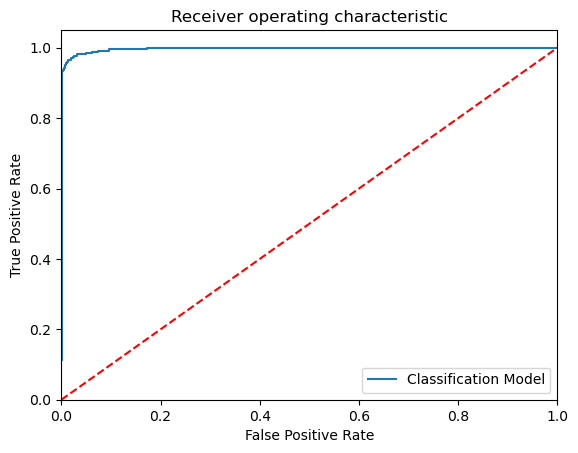

-----------------------------------------------------------------------------------------------------


In [39]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name

print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1= EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# SIGMOID KERNAL

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 1783   358]
 [ 2925 13897]]
Outcome values : 
 1783 358 2925 13897
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.83      0.52      2141
           0       0.97      0.83      0.89     16822

    accuracy                           0.83     18963
   macro avg       0.68      0.83      0.71     18963
weighted avg       0.91      0.83      0.85     18963

Accuracy : 82.7 %
Precision : 37.9 %
Recall : 83.3 %
F1 Score : 0.521
Specificity or True Negative Rate : 82.6 %
Balanced Accuracy : 82.9 %
MCC : 0.483
roc_auc_score: 0.829


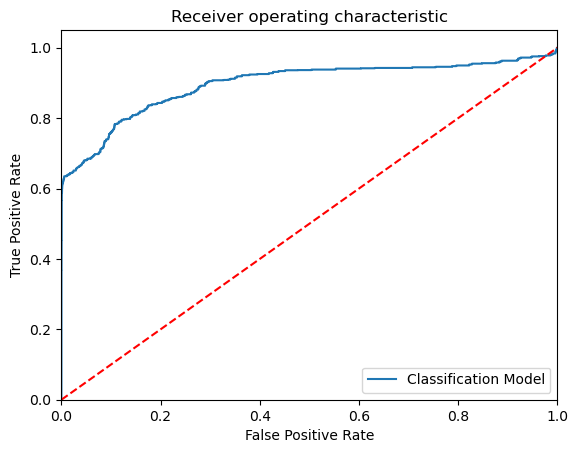

-----------------------------------------------------------------------------------------------------


In [40]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1= EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [41]:
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,1784,357,10,16812,0.981,0.994,0.833,0.907,0.999,0.900,0.916331,0.916
1,SVM - Polynominal,1885,256,26,16796,0.985,0.986,0.880,0.930,0.998,0.924,0.939442,0.939
2,SVM - Gaussian,2047,94,185,16637,0.985,0.917,0.956,0.936,0.989,0.928,0.972549,0.972
3,SVM - Sigmoid,1783,358,2925,13897,0.827,0.379,0.833,0.521,0.826,0.483,0.829454,0.829


In [42]:
# Since The Train Data Set has Large Number Of Records(> 60K) so I consider the Default Values For Algorithms  i.e

# For  Support vector Machine(SVM) , the kernal is rbf(radial basis function kernel)

# Classification Algorithm Camparision - Over Sampling

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1846   295]
 [   54 16768]]
Outcome values : 
 1846 295 54 16768
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.86      0.91      2141
           0       0.98      1.00      0.99     16822

    accuracy                           0.98     18963
   macro avg       0.98      0.93      0.95     18963
weighted avg       0.98      0.98      0.98     18963

Accuracy : 98.2 %
Precision : 97.2 %
Recall : 86.2 %
F1 Score : 0.914
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 93.0 %
MCC : 0.905
roc_auc_score: 0.93


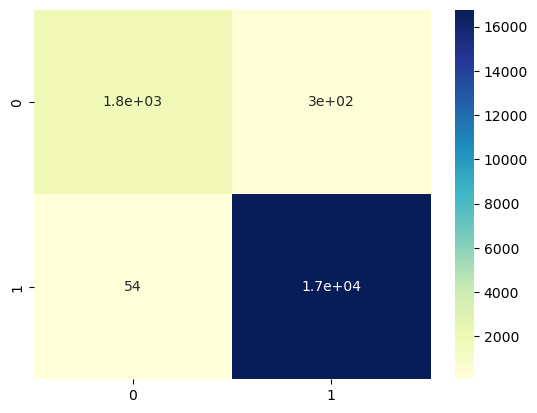

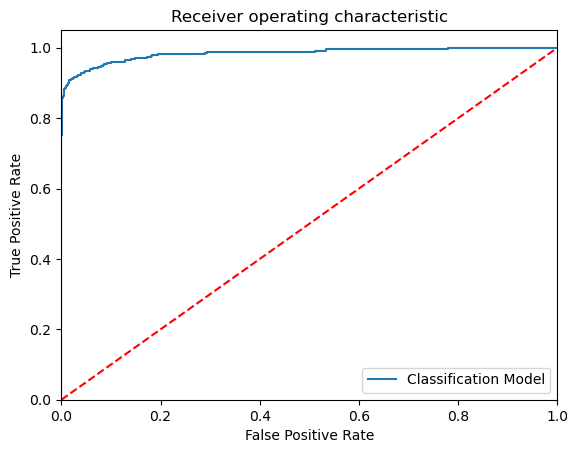

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 2108    33]
 [   43 16779]]
Outcome values : 
 2108 33 43 16779
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      0.99      0.99     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.6 %
Precision : 98.0 %
Recall : 98.5 %
F1 Score : 0.982
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.1 %
MCC : 0.98
roc_auc_score: 0.991


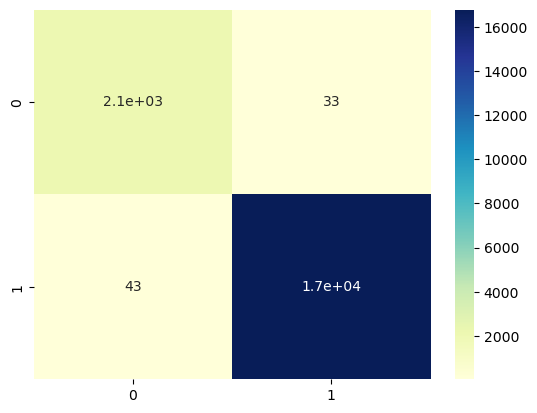

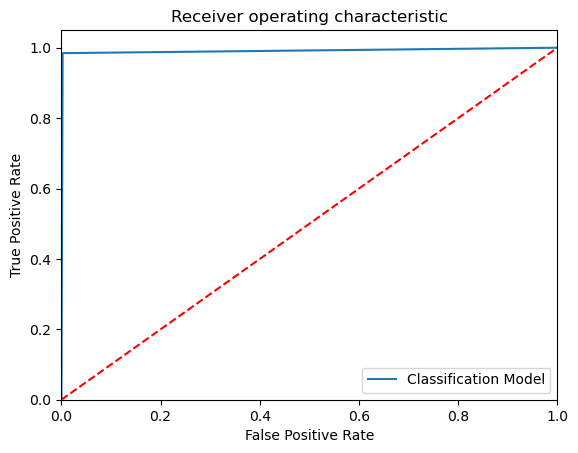

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 2141     0]
 [    5 16817]]
Outcome values : 
 2141 0 5 16817
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       1.00      1.00      1.00     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 100.0 %
Precision : 99.8 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 1.0


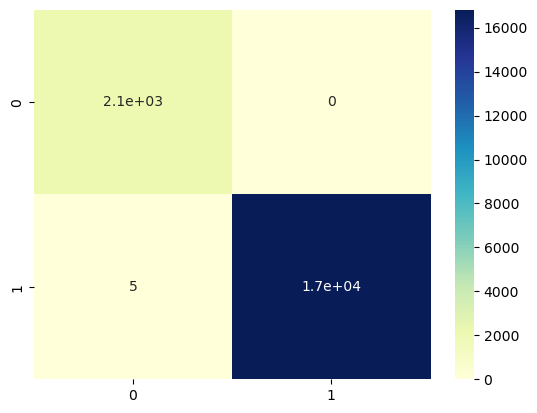

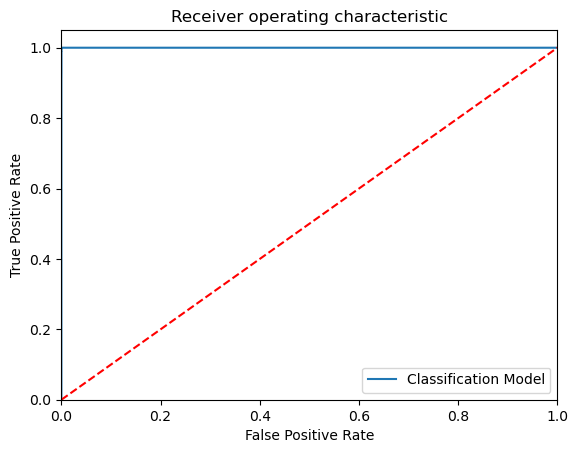

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2141     0]
 [    4 16818]]
Outcome values : 
 2141 0 4 16818
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       1.00      1.00      1.00     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 100.0 %
Precision : 99.8 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 1.0


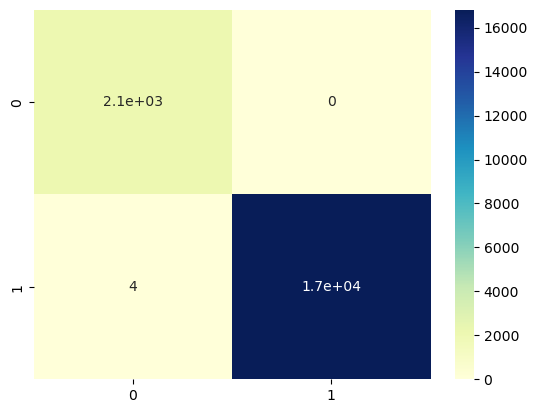

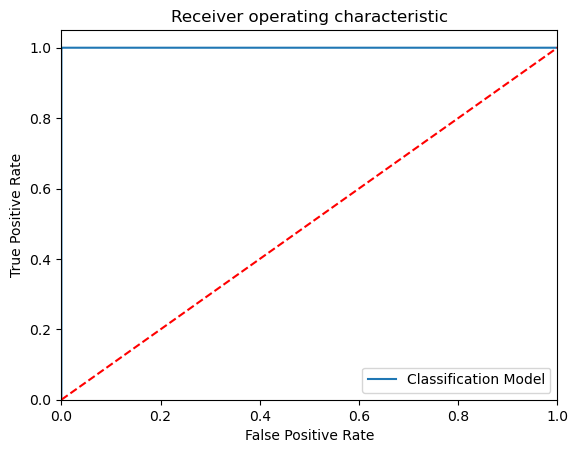

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 2141     0]
 [   23 16799]]
Outcome values : 
 2141 0 23 16799
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      2141
           0       1.00      1.00      1.00     16822

    accuracy                           1.00     18963
   macro avg       0.99      1.00      1.00     18963
weighted avg       1.00      1.00      1.00     18963

Accuracy : 99.9 %
Precision : 98.9 %
Recall : 100.0 %
F1 Score : 0.995
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
MCC : 0.994
roc_auc_score: 0.999


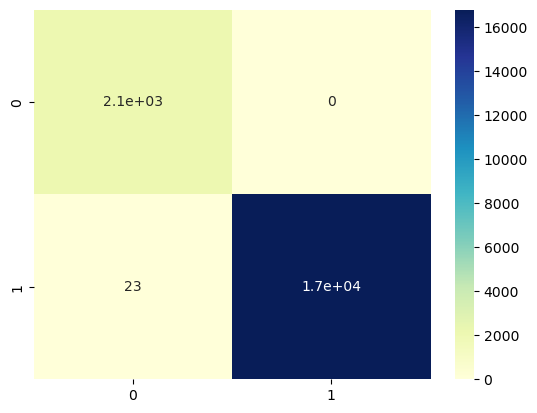

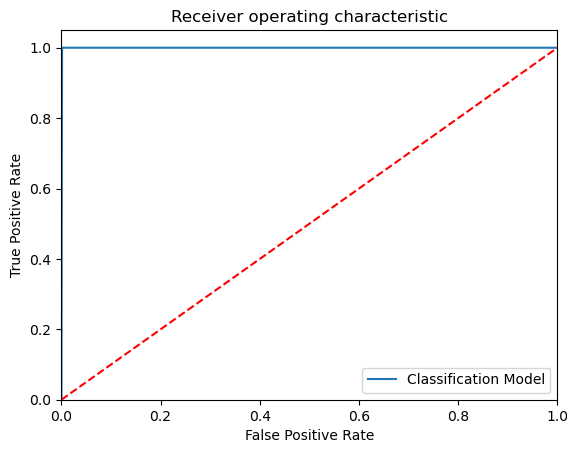

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 2047    94]
 [  185 16637]]
Outcome values : 
 2047 94 185 16637
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.96      0.94      2141
           0       0.99      0.99      0.99     16822

    accuracy                           0.99     18963
   macro avg       0.96      0.97      0.96     18963
weighted avg       0.99      0.99      0.99     18963

Accuracy : 98.5 %
Precision : 91.7 %
Recall : 95.6 %
F1 Score : 0.936
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 97.2 %
MCC : 0.928
roc_auc_score: 0.973


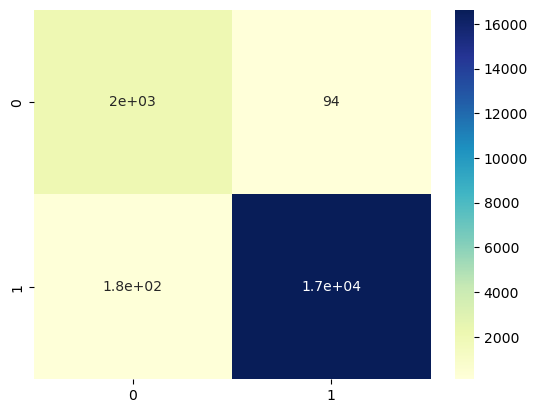

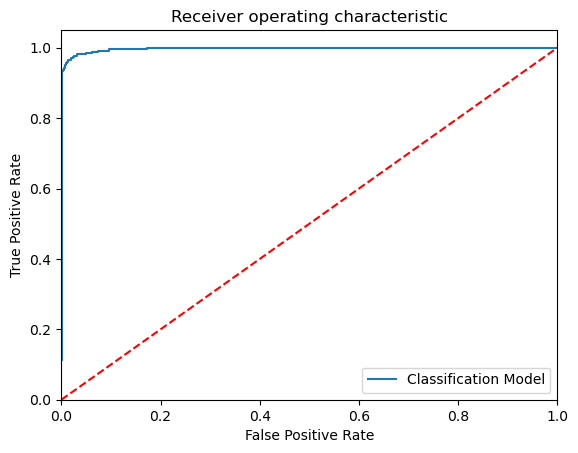

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1805   336]
 [  429 16393]]
Outcome values : 
 1805 336 429 16393
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.84      0.83      2141
           0       0.98      0.97      0.98     16822

    accuracy                           0.96     18963
   macro avg       0.89      0.91      0.90     18963
weighted avg       0.96      0.96      0.96     18963

Accuracy : 96.0 %
Precision : 80.8 %
Recall : 84.3 %
F1 Score : 0.825
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 90.8 %
MCC : 0.803
roc_auc_score: 0.909


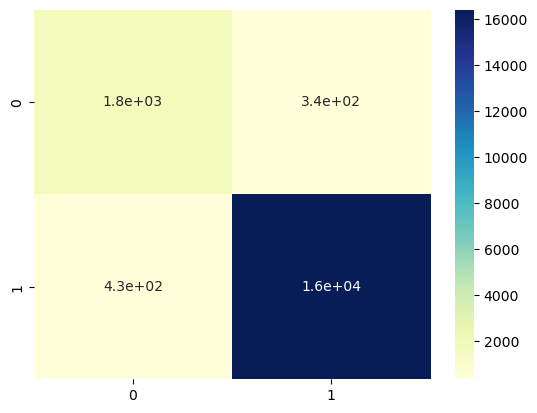

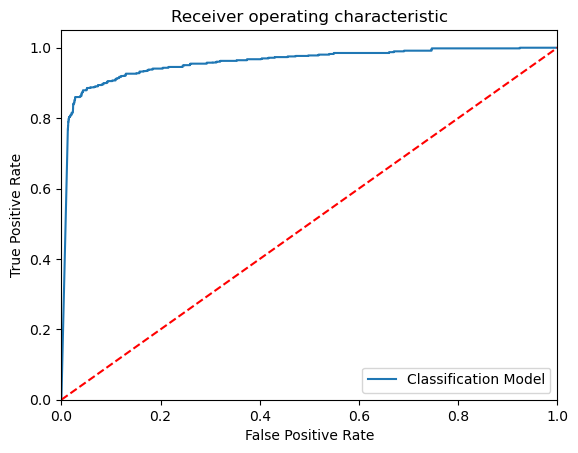

-----------------------------------------------------------------------------------------------------


In [43]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN,ModelSVM,ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # Create Heatmap for the confusion  matrix
    
    sns.heatmap(matrix,annot=True,cmap="YlGnBu")
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' :models,
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
    EMResults= EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [44]:
# Display the all the Records

EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1846,295,54,16768,0.982,0.972,0.862,0.914,0.997,0.905,0.929502,0.930
1,DecisionTreeClassifier(),2108,33,43,16779,0.996,0.980,0.985,0.982,0.997,0.980,0.991015,0.991
2,"(DecisionTreeClassifier(max_features='auto', r...",2141,0,5,16817,1.000,0.998,1.000,0.999,1.000,0.999,0.999851,1.000
3,"(ExtraTreeClassifier(random_state=1906462165),...",2141,0,4,16818,1.000,0.998,1.000,0.999,1.000,0.999,0.999881,1.000
4,KNeighborsClassifier(n_neighbors=1),2141,0,23,16799,0.999,0.989,1.000,0.995,0.999,0.994,0.999316,1.000
5,"SVC(class_weight='balanced', probability=True,...",2047,94,185,16637,0.985,0.917,0.956,0.936,0.989,0.928,0.972549,0.972
6,GaussianNB(),1805,336,429,16393,0.960,0.808,0.843,0.825,0.974,0.803,0.908781,0.908


In [45]:
# Since ExtraTree Algorithm has better performance.
# It is selected for our model.

In [46]:
# pedict the values for x-test using ExtraTreesClassifier

y_predET=ModelET.predict(x_test)

In [47]:
# display the Result

y_predET==y_test

48494    True
18957    True
53534    True
2863     True
5683     True
         ... 
30277    True
19214    True
44136    True
31729    True
41074    True
Name: Class, Length: 18963, dtype: bool